# PETR6397 Final Project: Oil Production Forecasting using Machine Learning

In [3]:
# Install required libraries

! pip install -q seaborn       # seaborn 
! pip install -q plotly        # plotly
! pip install -q matplotlib    # matplotlib
! pip install -q xgboost       # XGBoost
! pip install -q sklearn       # sklearn
! pip install -q scikit-learn  # scikit-learn:
! pip install -q statsmodels   # statsmodels
! pip install -q pmdarima      # pmdarima

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")


ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


## Part 1.  Exploratory Data Analysis

In [25]:
# Load the two data files from data folder into one dataframe df

# read the first CSV file into a DataFrame
df1 = pd.read_csv('Data/MonthlyProduction1.CSV')

# read the second CSV file into another DataFrame
df2 = pd.read_csv('Data/MonthlyProduction2.CSV')

# concatenate the two DataFrames vertically
df= pd.concat([df1, df2], axis=0)


# Visualize df
df.head(10)

,Entity ID,API/UWI,API/UWI List,Monthly Production Date,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Days,Daily Avg Oil,Daily Avg Gas,Daily Avg Water,Reservoir,Well/Lease Name,Well Number,Operator Company Name,Production Type,Production Status,Entity Type,Producing Month Number
0,130854587,4.213540e+13,4213538451,12/1/19,1.0,139.0,7,1,NaN,0.03,4.48,0.23,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,1
1,130854587,4.213540e+13,4213538451,1/1/20,22.0,270.0,1205,1,NaN,0.71,8.71,38.87,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,2
2,130854587,4.213540e+13,4213538451,2/1/20,15.0,130.0,846,1,NaN,0.52,4.48,29.17,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,3
3,130854587,4.213540e+13,4213538451,3/1/20,14.0,308.0,788,1,NaN,0.45,9.94,25.42,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,4
4,130854587,4.213540e+13,4213538451,4/1/20,13.0,268.0,773,1,NaN,0.43,8.93,25.77,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,5
5,130854587,4.213540e+13,4213538451,5/1/20,9.0,31.0,546,1,NaN,0.29,1.00,17.61,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,6
6,130854587,4.213540e+13,4213538451,6/1/20,6.0,0.0,395,1,NaN,0.20,0.00,13.17,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,7
7,130854587,4.213540e+13,4213538451,7/1/20,6.0,244.0,435,1,NaN,0.19,7.87,14.03,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,8
8,130854587,4.213540e+13,4213538451,8/1/20,12.0,262.0,832,1,NaN,0.39,8.45,26.84,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,9
9,130854587,4.213540e+13,4213538451,9/1/20,10.0,188.0,698,1,NaN,0.33,6.27,23.27,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,10


In [26]:
# check the shape of the DataFrame

print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (773296, 20)


In [27]:
# Data Profiling

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773296 entries, 0 to 386647
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Entity ID                773296 non-null  int64  
 1   API/UWI                  773296 non-null  float64
 2   API/UWI List             773296 non-null  object 
 3   Monthly Production Date  773296 non-null  object 
 4   Monthly Oil              772916 non-null  float64
 5   Monthly Gas              772940 non-null  float64
 6   Monthly Water            773296 non-null  int64  
 7   Well Count               773296 non-null  int64  
 8   Days                     27004 non-null   float64
 9   Daily Avg Oil            772916 non-null  float64
 10  Daily Avg Gas            772940 non-null  float64
 11  Daily Avg Water          773296 non-null  float64
 12  Reservoir                770612 non-null  object 
 13  Well/Lease Name          773296 non-null  object 
 14  Well

In [28]:
# Checking Production type

production_types = df['Production Type'].unique()
print("Unique Production Types:", production_types)


Unique Production Types: ['OIL' 'GAS']


We have two types of Production in the datset. 

As we are focussed only into oil production; We will filter column 'Production Type' to 'Oil'

In [29]:
# Filter dataset for only for oil production type

df = df[df['Production Type'] == 'OIL']
df

,Entity ID,API/UWI,API/UWI List,Monthly Production Date,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Days,Daily Avg Oil,Daily Avg Gas,Daily Avg Water,Reservoir,Well/Lease Name,Well Number,Operator Company Name,Production Type,Production Status,Entity Type,Producing Month Number
0,130854587,4.213540e+13,4213538451,12/1/19,1.0,139.0,7,1,NaN,0.03,4.48,0.23,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,1
1,130854587,4.213540e+13,4213538451,1/1/20,22.0,270.0,1205,1,NaN,0.71,8.71,38.87,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,2
2,130854587,4.213540e+13,4213538451,2/1/20,15.0,130.0,846,1,NaN,0.52,4.48,29.17,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,3
3,130854587,4.213540e+13,4213538451,3/1/20,14.0,308.0,788,1,NaN,0.45,9.94,25.42,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,4
4,130854587,4.213540e+13,4213538451,4/1/20,13.0,268.0,773,1,NaN,0.43,8.93,25.77,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386643,127799434,4.210000e+13,4213533443,9/1/22,8.0,0.0,287,1,NaN,0.27,0.00,9.57,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,237,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,497
386644,127799434,4.210000e+13,4213533443,10/1/22,7.0,0.0,240,1,NaN,0.23,0.00,7.74,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,237,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,498
386645,127799434,4.210000e+13,4213533443,11/1/22,9.0,0.0,294,1,NaN,0.30,0.00,9.80,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,237,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,499
386646,127799434,4.210000e+13,4213533443,12/1/22,9.0,0.0,298,1,NaN,0.29,0.00,9.61,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,237,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,500


In [30]:
# check the shape of the DataFrame

print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (771708, 20)


In [31]:
# print total well count in the dataset

well_count = df['Entity ID'].nunique()
print("Total number of unique oil producing wells:", well_count)

Total number of unique oil producing wells: 1046


In [32]:
# We can create a new column Gas to Oil Ratio (i.e GOR) which is important parameter in oil production

df['GOR'] = df['Monthly Gas'] / df['Monthly Oil']
df.head(10)

,Entity ID,API/UWI,API/UWI List,Monthly Production Date,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Days,Daily Avg Oil,...,Daily Avg Water,Reservoir,Well/Lease Name,Well Number,Operator Company Name,Production Type,Production Status,Entity Type,Producing Month Number,GOR
0,130854587,4.213540e+13,4213538451,12/1/19,1.0,139.0,7,1,NaN,0.03,...,0.23,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,1,139.000000
1,130854587,4.213540e+13,4213538451,1/1/20,22.0,270.0,1205,1,NaN,0.71,...,38.87,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,2,12.272727
2,130854587,4.213540e+13,4213538451,2/1/20,15.0,130.0,846,1,NaN,0.52,...,29.17,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,3,8.666667
3,130854587,4.213540e+13,4213538451,3/1/20,14.0,308.0,788,1,NaN,0.45,...,25.42,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,4,22.000000
4,130854587,4.213540e+13,4213538451,4/1/20,13.0,268.0,773,1,NaN,0.43,...,25.77,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,5,20.615385
5,130854587,4.213540e+13,4213538451,5/1/20,9.0,31.0,546,1,NaN,0.29,...,17.61,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,6,3.444444
6,130854587,4.213540e+13,4213538451,6/1/20,6.0,0.0,395,1,NaN,0.20,...,13.17,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,7,0.000000
7,130854587,4.213540e+13,4213538451,7/1/20,6.0,244.0,435,1,NaN,0.19,...,14.03,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,8,40.666667
8,130854587,4.213540e+13,4213538451,8/1/20,12.0,262.0,832,1,NaN,0.39,...,26.84,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,9,21.833333
9,130854587,4.213540e+13,4213538451,9/1/20,10.0,188.0,698,1,NaN,0.33,...,23.27,CLEAR FORK,SCIMITAR,1,OCCIDENTAL PETROLEUM,OIL,ACTIVE,COM,10,18.800000


In [33]:
# Information about Data type 

df.dtypes

Entity ID                    int64
API/UWI                    float64
API/UWI List                object
Monthly Production Date     object
Monthly Oil                float64
Monthly Gas                float64
Monthly Water                int64
Well Count                   int64
Days                       float64
Daily Avg Oil              float64
Daily Avg Gas              float64
Daily Avg Water            float64
Reservoir                   object
Well/Lease Name             object
Well Number                 object
Operator Company Name       object
Production Type             object
Production Status           object
Entity Type                 object
Producing Month Number       int64
GOR                        float64
dtype: object

In [34]:
# summary statistics for numerical columns

df.describe()

,Entity ID,API/UWI,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Days,Daily Avg Oil,Daily Avg Gas,Daily Avg Water,Producing Month Number,GOR
count,7.717080e+05,7.717080e+05,771708.000000,771352.000000,7.717080e+05,771708.000000,25800.0,771708.000000,771352.000000,771708.000000,771708.000000,7.711980e+05
mean,1.264904e+08,4.211762e+13,537.069617,503.662564,7.410641e+03,1.020899,0.0,17.644106,16.543608,243.457731,257.579139,inf
std,1.194819e+07,1.762412e+10,1103.489538,2571.974725,1.861662e+04,0.272107,0.0,36.237771,84.439577,611.548588,194.597316,NaN
min,4.748530e+05,4.210000e+13,0.000000,0.000000,0.000000e+00,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000e+00
25%,1.273339e+08,4.210000e+13,91.000000,15.000000,6.240000e+02,1.000000,0.0,3.000000,0.480000,20.550000,95.000000,6.544101e-02
50%,1.275302e+08,4.211750e+13,230.000000,67.000000,2.986000e+03,1.000000,0.0,7.570000,2.230000,98.100000,214.000000,2.777778e-01
75%,1.277265e+08,4.213530e+13,561.000000,280.000000,7.428000e+03,1.000000,0.0,18.420000,9.230000,243.740000,389.000000,1.059701e+00
max,1.310139e+08,4.213590e+13,35382.000000,190132.000000,1.411641e+06,9.000000,0.0,1141.350000,6133.290000,45536.810000,997.000000,inf


In [35]:
# check for any missing values

print("\n Number of missing values:")
df.isna().sum()


 Number of missing values:


Entity ID                       0
API/UWI                         0
API/UWI List                    0
Monthly Production Date         0
Monthly Oil                     0
Monthly Gas                   356
Monthly Water                   0
Well Count                      0
Days                       745908
Daily Avg Oil                   0
Daily Avg Gas                 356
Daily Avg Water                 0
Reservoir                    2684
Well/Lease Name                 0
Well Number                  6866
Operator Company Name           0
Production Type                 0
Production Status               0
Entity Type                     0
Producing Month Number          0
GOR                           510
dtype: int64

We observe that there are three common features to distinguish between wells, namely 'Entity ID', 'API/UWi', and 'API/UWI List,' all having the same significance in identifying a particular well. Therefore, any one of these features can be considered to uniquely identify a well. In this case, we are identifying a well with its unique 'Entity ID' and will drop the 'API/UWi' and 'API/UWI List' features.

Furthermore, the 'Days' and 'Well Number' columns have only 27,004 values out of a total of 773,296 rows, making imputation methods unsuitable for handling missing value issues, as they may introduce bias into the dataset. Therefore, to achieve better efficiency, we recommend dropping the 'Days' and 'Well Number' columns.

In [36]:
# drop the 'API/UWI','API/UWI List','Days','Well Number' columns

df = df.drop(columns=['API/UWI','API/UWI List','Days','Well Number'])
df.isna().sum()

Entity ID                     0
Monthly Production Date       0
Monthly Oil                   0
Monthly Gas                 356
Monthly Water                 0
Well Count                    0
Daily Avg Oil                 0
Daily Avg Gas               356
Daily Avg Water               0
Reservoir                  2684
Well/Lease Name               0
Operator Company Name         0
Production Type               0
Production Status             0
Entity Type                   0
Producing Month Number        0
GOR                         510
dtype: int64

Upon observing the data, we note a significant difference between the mean and median values for monthly oil production, where the mean is 536.23 and the median is 229. Therefore, replacing the missing values with the median of non-missing values is the optimal imputation method. This method is more robust to outliers than mean imputation and is suitable for skewed or outlier-containing data. Thus, we will impute the median values for 'Monthly Oil', 'Monthly Gas', 'Daily Avg Oil', 'Daily Avg Gas', and 'GOR'. Additionally, while computing the 'GOR' column, we encountered division errors resulting in 'inf' values, which can also be imputed using the median imputation method.

Finally, we will use mode imputation to impute the missing values in the categorical feature 'Reservoir' column.

In [37]:
# Imputation for missing values 

# A) impute missing values with median for numerical columns i.e. 'Monthly Oil', 'Monthly Gas', 'Daily Avg Oil', 'Daily Avg Gas'
num_cols = ['Monthly Oil', 'Monthly Gas', 'Daily Avg Oil', 'Daily Avg Gas','GOR']
for col in num_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# replace division error values in the GOR column with the median of the column
median_GOR = df['GOR'].replace([np.inf, -np.inf], np.nan).median()
df['GOR'] = df['GOR'].replace([np.inf, -np.inf], median_GOR)

# B) Now lets impute object feature 'Reservoir' with mode
df['Reservoir'].fillna(df['Reservoir'].mode()[0], inplace=True)

df.isna().sum()

Entity ID                  0
Monthly Production Date    0
Monthly Oil                0
Monthly Gas                0
Monthly Water              0
Well Count                 0
Daily Avg Oil              0
Daily Avg Gas              0
Daily Avg Water            0
Reservoir                  0
Well/Lease Name            0
Operator Company Name      0
Production Type            0
Production Status          0
Entity Type                0
Producing Month Number     0
GOR                        0
dtype: int64

In [38]:
# Analyzing other categorical feature
unique_operators = df['Operator Company Name'].unique()
unique_production_types = df['Production Type'].unique()
unique_entity_types = df['Entity Type'].unique()
unique_production_statuses = df['Production Status'].unique()

print("Unique Operator Company Name:", unique_operators)
print("Unique Production Type:", unique_production_types)
print("Unique Production Statuses:", unique_production_statuses)
print("Unique Entity Types:", unique_entity_types)


Unique Operator Company Name: ['OCCIDENTAL PETROLEUM']
Unique Production Type: ['OIL']
Unique Production Statuses: ['ACTIVE']
Unique Entity Types: ['COM' 'LEASE']


As observed above, the categorical features 'Operator Company Name', 'Production Type', and 'Production Status' have only one value, which does not offer much information. Therefore, it is recommended to drop the features 'Operator Company Name' and 'Production Status' from the dataset.

In [39]:
# drop the 'Operator Company Name','Production Type','Production Status' columns

df = df.drop(columns=['Operator Company Name','Production Type','Production Status'])
df.isna().sum()

Entity ID                  0
Monthly Production Date    0
Monthly Oil                0
Monthly Gas                0
Monthly Water              0
Well Count                 0
Daily Avg Oil              0
Daily Avg Gas              0
Daily Avg Water            0
Reservoir                  0
Well/Lease Name            0
Entity Type                0
Producing Month Number     0
GOR                        0
dtype: int64

In [158]:
# # Export the Cleaned data to a CSV file for Visualising with PowerBI

# p.to_csv('cleaned_dataset.csv', index=False)

KeyboardInterrupt: 

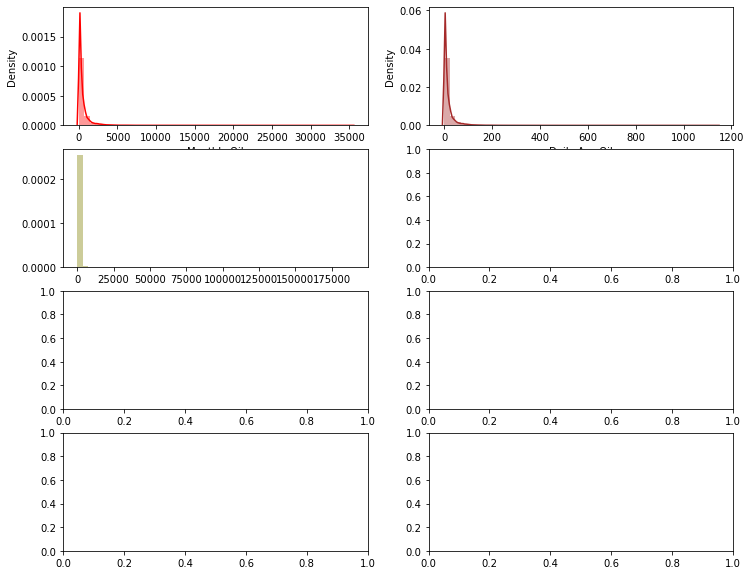

In [159]:
#let’s visualize the distribution of each parameter

f, axes = plt.subplots(4, 2, figsize=(12, 10))
sns.distplot(df['Monthly Oil'] , color="red", ax=axes[0, 0])
sns.distplot(df['Daily Avg Oil'] , color="brown", ax=axes[0, 1])
sns.distplot(df['Monthly Gas'] , color="olive", ax=axes[1, 0])
sns.distplot(df['Daily Avg Gas'] , color="green", ax=axes[1, 1])
sns.distplot(df['Monthly Water'] , color="blue", ax=axes[2, 0])
sns.distplot(df['Daily Avg Water'] , color="cyan", ax=axes[2, 1])
sns.distplot(df['Well Count'] , color="orange", ax=axes[3, 0])
sns.distplot(df['GOR'] , color="yellow", ax=axes[3, 1])

plt.tight_layout()

In [ ]:
# Checking any correlations between each other using a pairplot graph   (Note: Compuation time = approx 10 min)

# sns.pairplot(df)

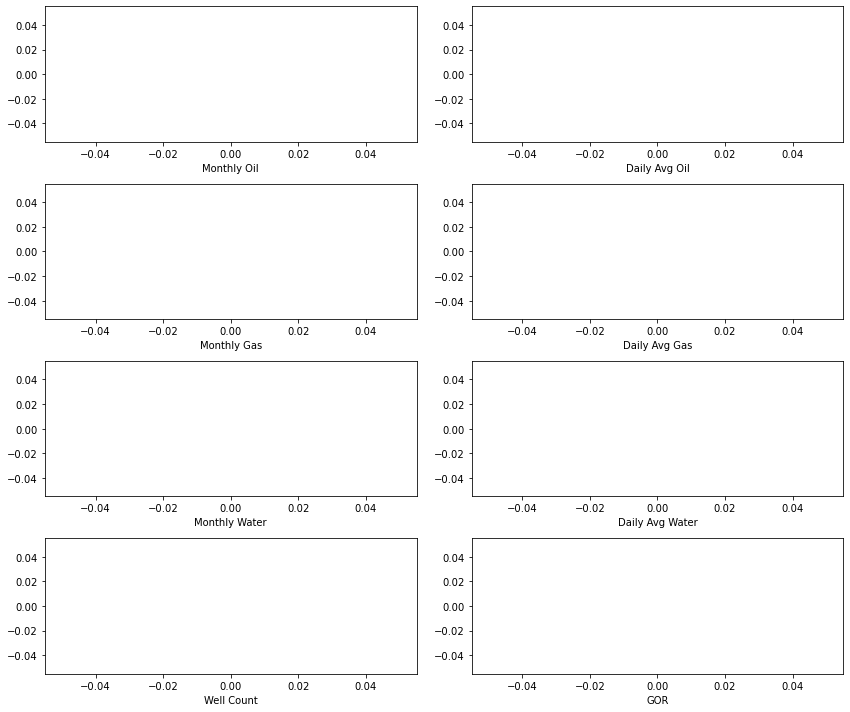

In [ ]:
#let’s visualize the relations for each parameter

f, axes = plt.subplots(4, 2, figsize=(12, 10))
sns.scatterplot(df['Monthly Oil'] , color="red", ax=axes[0, 0])
sns.scatterplot(df['Daily Avg Oil'] , color="brown", ax=axes[0, 1])
sns.scatterplot(df['Monthly Gas'] , color="olive", ax=axes[1, 0])
sns.scatterplot(df['Daily Avg Gas'] , color="green", ax=axes[1, 1])
sns.scatterplot(df['Monthly Water'] , color="blue", ax=axes[2, 0])
sns.scatterplot(df['Daily Avg Water'] , color="cyan", ax=axes[2, 1])
sns.scatterplot(df['Well Count'] , color="orange", ax=axes[3, 0])
sns.scatterplot(df['GOR'] , color="yellow", ax=axes[3, 1])

plt.tight_layout()

<AxesSubplot:>

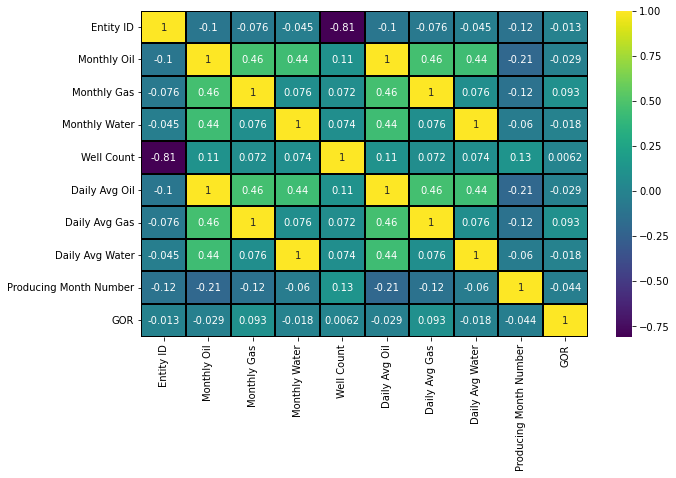

In [ ]:
# Lets find any collinearity between input features using seaborn library

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),linewidths=2, linecolor='black',cmap='viridis', annot=True)

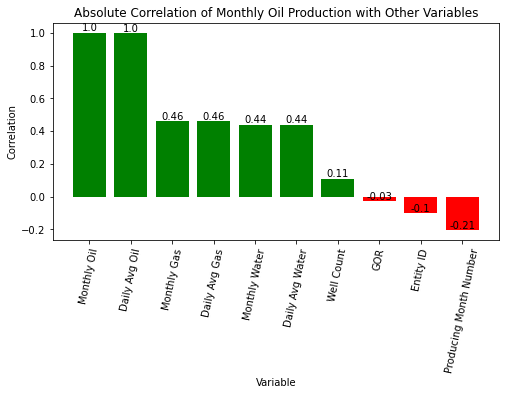

In [ ]:
# calculate the correlation coefficients with the target variable
corr_matrix = df.corr(method='pearson')['Monthly Oil'].sort_values(ascending=False)

# Create a bar plot of the correlation matrix
fig, ax = plt.subplots(figsize=(8,4))
colors = np.where(corr_matrix.values > 0, 'g', 'r')
ax.bar(corr_matrix.index, corr_matrix.values, color=colors)

# Set the title and axis labels
ax.set_title('Absolute Correlation of Monthly Oil Production with Other Variables')
ax.set_xlabel('Variable')
ax.set_ylabel('Correlation')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=78)

# Annotate the correlation values on the bars
for i, v in enumerate(corr_matrix.values):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center')

# Show the plot
plt.show()

It is evident that 'Monthly Oil' production is strongly correlated with 'Daily Avg Oil'. Similarly, 'Monthly Water' and 'Monthly Gas' exhibit a high correlation with 'Daily Water' and 'Daily Gas'. As a result, to reduce the complexity of the model and avoid multicollinearity issues, it is generally recommended to remove one of the correlated features. 

Thus, while implementing the model, it is advisable to ignore these highly correlated features, namely 'Daily Avg Oil', 'Daily Water', and 'Daily Gas' to avoid multicollinearity issues.

## Part 2.  Implementing Machine Learning Models

### a. Data Transformation & Splitting it into Training, Validation & Test Dataset

In [ ]:
# Load the dataset and create the features and target variable
X = df[['Entity ID','Monthly Gas','Monthly Water','Well Count','Producing Month Number','GOR']]
y = df['Monthly Oil']

from sklearn.preprocessing import StandardScaler

# create and fit into StandardScaler for X
scaler_X = StandardScaler().fit(X)

# transform features in X 
X_scaled = scaler_X.transform(X)

# create and fit into StandardScaler for y
scaler_y = StandardScaler().fit(y.to_numpy().reshape(-1, 1))

# transform target features y
y_scaled = scaler_y.transform(y.to_numpy().reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### b.  Multiple Model Implementation

In [ ]:
# Implement & fit the models using GridsearchCV & Kfold cross validation

# Create K-fold cross validation for GridSearch calculations
cv = KFold(n_splits=5)

# 1. Linear Regression
lr_param_grid = {'fit_intercept': [True, False]}
lr = GridSearchCV(LinearRegression(),lr_param_grid,cv=cv).fit(X_train, y_train)

In [ ]:
# 2. Ridge Regression
ridge_param_grid = {'alpha': [0.01, 0.1, 1.0, 10, 100]}
ridge = GridSearchCV(Ridge(random_state=42), ridge_param_grid, cv=cv).fit(X_train, y_train)

In [ ]:
# 3. Lasso Regression
lasso_param_grid = {'alpha': [0.01, 0.1, 1.0, 10, 100]}
lasso = GridSearchCV(Lasso(random_state=42), lasso_param_grid, cv=cv).fit(X_train, y_train)

In [ ]:
# 4. KNN                                     (Note: Compuation time = approx 5 min)
knn_param_grid = {
    'n_neighbors': [5, 10, 15],
    'weights': ['uniform', 'distance']}
knn = GridSearchCV(KNeighborsRegressor(), knn_param_grid, cv=cv).fit(X_train, y_train)

In [ ]:
# 5. Decision Tree
tree_param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]}
dtree = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_param_grid, cv=cv).fit(X_train, y_train)

In [ ]:
# 6. RandomForest                             (Note: Compuation time = approx 9-12 min)
rforest_param_grid = {
    'n_estimators': [10, 20, 30],
    'max_features': ['sqrt', 'log2']}
rforest = GridSearchCV(RandomForestRegressor(random_state=42),rforest_param_grid, cv=cv).fit(X_train, y_train)

In [ ]:
# 7. XGBoost                                  (Note: Compuation time = approx 12-15 min)
xgb_param_grid = {
    'max_depth': [5, 10, 15],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [10, 20, 30]}
xgboost = GridSearchCV(xgb.XGBRegressor(random_state=42),xgb_param_grid, cv=cv).fit(X_train, y_train)

### c. Validating all the Model Evaluation on the Validation dataset

In [ ]:
 # Evaluate the Best model from the validation set

models = [lr, ridge, lasso, knn, dtree, rforest, xgboost]
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'Decision Tree','Random Forest', 'XGBoost']
best_models = []

print('Model Evaluation on Validation data')
for i, model in enumerate(models):
    y_val_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_val_pred)
    mse = mean_squared_error(y_val, y_val_pred)
    print(f"\n{model_names[i]}:")
    print(f"R2 score: {r2}")
    print(f"RMSE: {np.sqrt(mse)}")

Model Evaluation on Validation data

Linear Regression:
R2 score: 0.4002835984326836
RMSE: 0.7892702785933552

Ridge:
R2 score: 0.4002798931808971
RMSE: 0.7892727167796254

Lasso:
R2 score: 0.4000400304709236
RMSE: 0.7894305388741967

KNN:
R2 score: 0.9367504270527638
RMSE: 0.25631946298374797

Decision Tree:
R2 score: 0.9790504504439774
RMSE: 0.14751634062045346

Random Forest:
R2 score: 0.9913997416765225
RMSE: 0.0945166964691728

XGBoost:
R2 score: 0.9905528266459477
RMSE: 0.09906123272316117


### d. Final Model Performances comparison on the Testing dataset

In [ ]:
 # Evaluate all the models on Testing data set

models = [lr, ridge, lasso, knn, dtree, rforest, xgboost]
model_names = ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'Decision Tree', 'Random Forest','XGBoost']
best_models = []
print('Final Model Evaluation on Test data')
for i, model in enumerate(models):
    y_test_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    print(f"\n{model_names[i]}:")
    print(f"R2 score: {r2}")
    print(f"RMSE: {np.sqrt(mse)}")

Final Model Evaluation on Test data

Linear Regression:
R2 score: 0.38730477735701196
RMSE: 0.7795032348506163

Ridge:
R2 score: 0.3873044609742903
RMSE: 0.779503436109998

Lasso:
R2 score: 0.3872075083850002
RMSE: 0.7795651077578092

KNN:
R2 score: 0.9348256012544153
RMSE: 0.2542343283853499

Decision Tree:
R2 score: 0.9709721023107185
RMSE: 0.16966937757133516

Random Forest:
R2 score: 0.9893216087641635
RMSE: 0.10290786996245888

XGBoost:
R2 score: 0.9858346451113804
RMSE: 0.11852484731667193


### e. Visualizing all the Model Predictions on Testing dataset

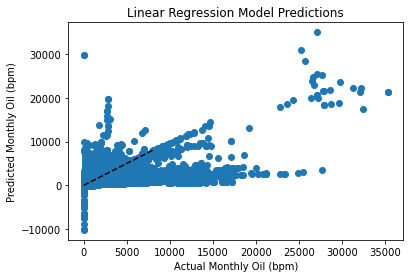

In [ ]:
# Lets Inverse transform the scaled target variable to original target variables
y_test_org = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# A) Linear Regression Model Predictions on Testing data set
y_pred_lr= lr.predict(X_test)

# Inverse transform the scaled predictions
y_pred_lr_org = scaler_y.inverse_transform(y_pred_lr.reshape(-1, 1))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test_org, y_pred_lr_org)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil (bpm)")
plt.ylabel("Predicted Monthly Oil (bpm)")
plt.title("Linear Regression Model Predictions")
plt.show()

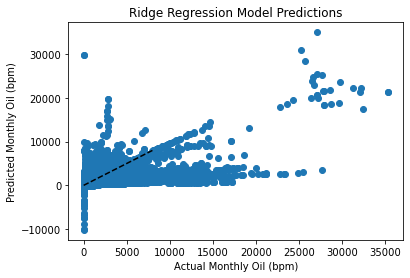

In [ ]:
# B) Ridge Regression Model Predictions on Testing data set
y_pred_ridge = ridge.predict(X_test)

# Inverse transform the scaled predictions
y_pred_ridge_org = scaler_y.inverse_transform(y_pred_ridge.reshape(-1, 1))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test_org, y_pred_ridge_org)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil (bpm)")
plt.ylabel("Predicted Monthly Oil (bpm)")
plt.title("Ridge Regression Model Predictions")
plt.show()

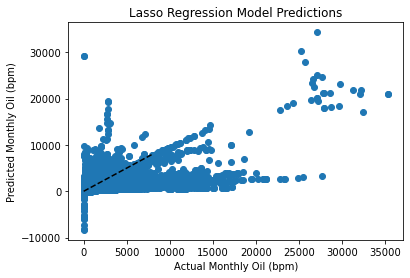

In [ ]:
# C) Lasso Regression Model Predictions on Testing data set
y_pred_lasso = lasso.predict(X_test)

# Inverse transform the scaled predictions
y_pred_lasso_org = scaler_y.inverse_transform(y_pred_lasso.reshape(-1, 1))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test_org, y_pred_lasso_org)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil (bpm)")
plt.ylabel("Predicted Monthly Oil (bpm)")
plt.title("Lasso Regression Model Predictions")
plt.show()

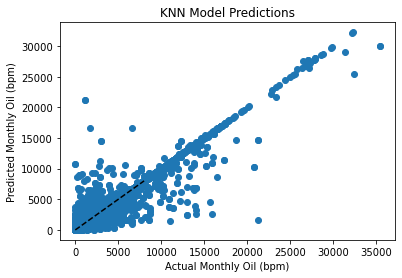

In [ ]:
# D) KNN Model Predictions on VTesting data set
y_pred_knn = knn.predict(X_test)

# Inverse transform the scaled predictions
y_pred_knn_org = scaler_y.inverse_transform(y_pred_knn.reshape(-1, 1))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test_org, y_pred_knn_org)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil (bpm)")
plt.ylabel("Predicted Monthly Oil (bpm)")
plt.title("KNN Model Predictions")
plt.show()

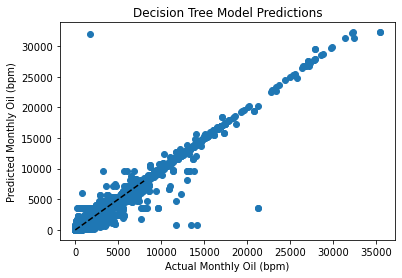

In [ ]:
# E) Decision Tree Model Predictions on Testing data set
y_pred_dtree = dtree.predict(X_test)

# Inverse transform the scaled predictions
y_pred_dtree_org = scaler_y.inverse_transform(y_pred_dtree.reshape(-1, 1))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test_org, y_pred_dtree_org)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil (bpm)")
plt.ylabel("Predicted Monthly Oil (bpm)")
plt.title("Decision Tree Model Predictions")
plt.show()

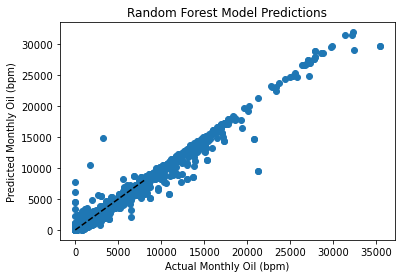

In [ ]:
# F) Random Forest Model Predictions on Testing data set
y_pred_rforest = rforest.predict(X_test)

# Inverse transform the scaled predictions
y_pred_rforest_org = scaler_y.inverse_transform(y_pred_rforest.reshape(-1, 1))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test_org, y_pred_rforest_org)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil (bpm)")
plt.ylabel("Predicted Monthly Oil (bpm)")
plt.title("Random Forest Model Predictions")
plt.show()

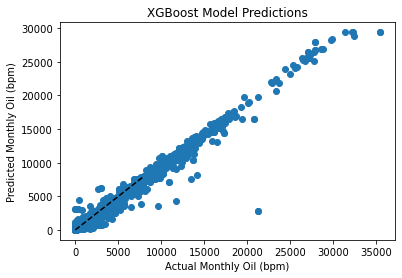

In [ ]:
# G) XGBoost Model Predictions on Testing data set
y_pred_xgb = xgboost.predict(X_test)

# Inverse transform the scaled predictions
y_pred_xgb_org = scaler_y.inverse_transform(y_pred_xgb.reshape(-1, 1))

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test_org, y_pred_xgb_org)
plt.plot([0, 8000], [0, 8000], '--k')
plt.xlabel("Actual Monthly Oil (bpm)")
plt.ylabel("Predicted Monthly Oil (bpm)")
plt.title("XGBoost Model Predictions")
plt.show()

We have seen that Random Forest is been performing best in both the Validation and Testing dataset, based on model evaluation like R2 being highest (i.e. 0.99 to 0.98) & RMSE being the lowest of all other models (i.e. 0.08 to 0.10) . 

---Summary---

a) Validation results for Random Forest:-

    R2 score: 0.991

    RMSE: 0.095

b) Testing results for Random Forest:-

    R2 score: 0.989

    RMSE: 0.104

Thus, we can select "Random Forest" for our given problem in oil production forecasting. 

## Part 3. Forecasting Estimated Ultimate Recovery (EUR) using ARIMA model

In [19]:
print(df['Entity ID'].unique())

[130854587 130831615 130751622 ... 127820554 127820411 127799434]


In [40]:
unique_wells = df['Entity ID'].unique()


In [53]:
unique_wells[0:20]

array([130854587, 130831615, 130751622, 130204826, 130157156, 130094870,
       130029586, 130029585, 129869598, 129720697, 129645700, 129604914,
       129566730, 129032549, 129018412, 129018408, 129018396, 128921475,
       128906514, 128891587], dtype=int64)

In [77]:
# ARIMA Model for Estimated Ultimate Recovery (EUR)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# # Preprocess the data
# # df['Entity ID'] = pd.to_datetime(df['Monthly Production Date'])
# df.set_index('Well/Lease Name', inplace=True)
# df['Cumulative Oil'] = df['Monthly Oil'].cumsum()

df5 = df[df['Entity ID'] == 127820411]
print(df5)

        Entity ID Monthly Production Date  Monthly Oil  Monthly Gas  \
385819  127820411                 10/1/76       2979.0          0.0   
385820  127820411                 11/1/76       7321.0       3015.0   
385821  127820411                 12/1/76       4144.0        622.0   
385822  127820411                  1/1/77       4103.0        829.0   
385823  127820411                  2/1/77       3693.0        800.0   
...           ...                     ...          ...          ...   
386370  127820411                  9/1/22         51.0         28.0   
386371  127820411                 10/1/22         49.0         24.0   
386372  127820411                 11/1/22         40.0         25.0   
386373  127820411                 12/1/22         40.0         21.0   
386374  127820411                  1/1/23         58.0         28.0   

        Monthly Water  Well Count  Daily Avg Oil  Daily Avg Gas  \
385819          26518           1          96.10           0.00   
385820       

In [78]:
monthly_gas_1 = df5['Monthly Gas']

Text(0.5, 1.0, 'Decline Curve')

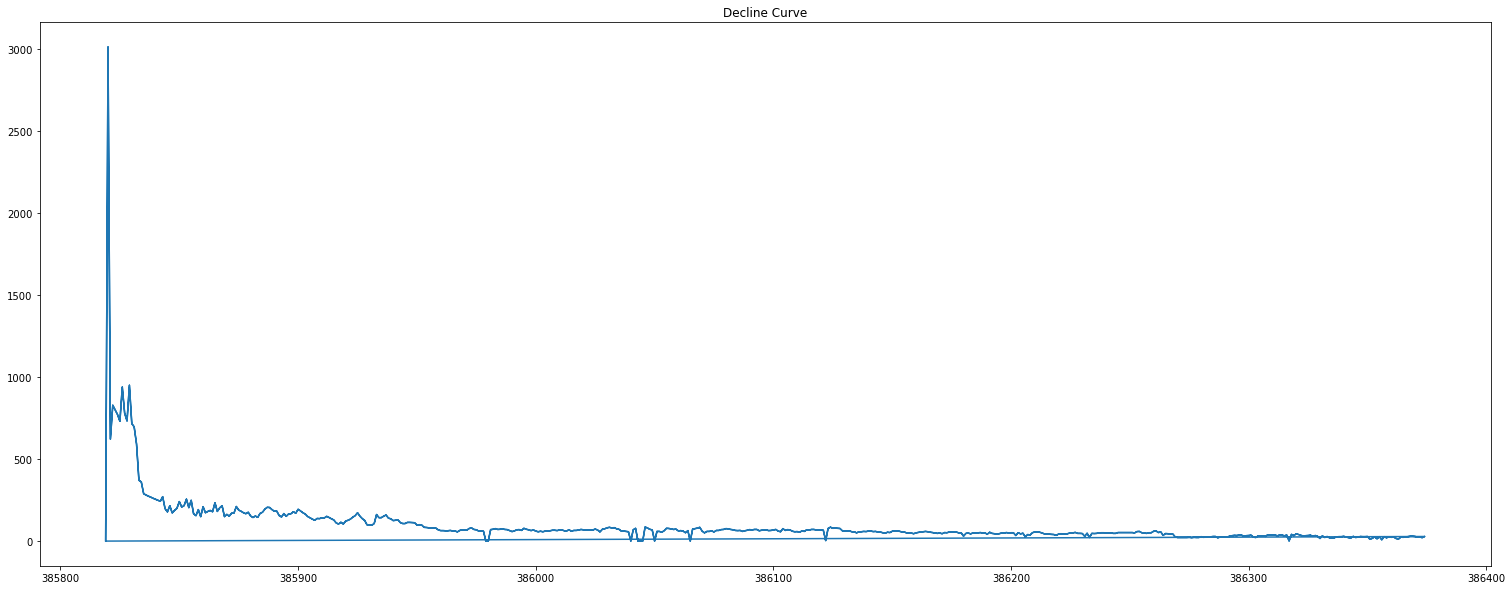

In [80]:
plt.figure(figsize=(26,10))
plt.plot(monthly_gas_1)
plt.title('Decline Curve')

In [81]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# ignore warnings
warnings.filterwarnings('ignore')

# define the range for p, d, and q
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

# create a list of all possible (p, d, q) tuples
pdq = list(product(p, d, q))

# evaluate ARIMA model with each (p, d, q) tuple
results = []
for param in pdq:
    try:
        model_arima = ARIMA(monthly_gas_1, order=param)
        model_arima_fit = model_arima.fit()
        results.append((param, model_arima_fit.aic))
    except:
        continue

# find the (p, d, q) tuple with the lowest AIC value
best_pdq = min(results, key=lambda x: x[1])[0]

# fit ARIMA model with the best (p, d, q) tuple
model_arima = ARIMA(monthly_gas_1, order=best_pdq)
model_arima_fit = model_arima.fit()

# make ARIMA forecast
arima_forecast = model_arima_fit.forecast(steps=1)

# print forecasts and best (p, d, q) tuple
print("Best (p, d, q) tuple:", best_pdq)

Best (p, d, q) tuple: (1, 1, 1)


In [82]:
predictions = model_arima.fit().predict()

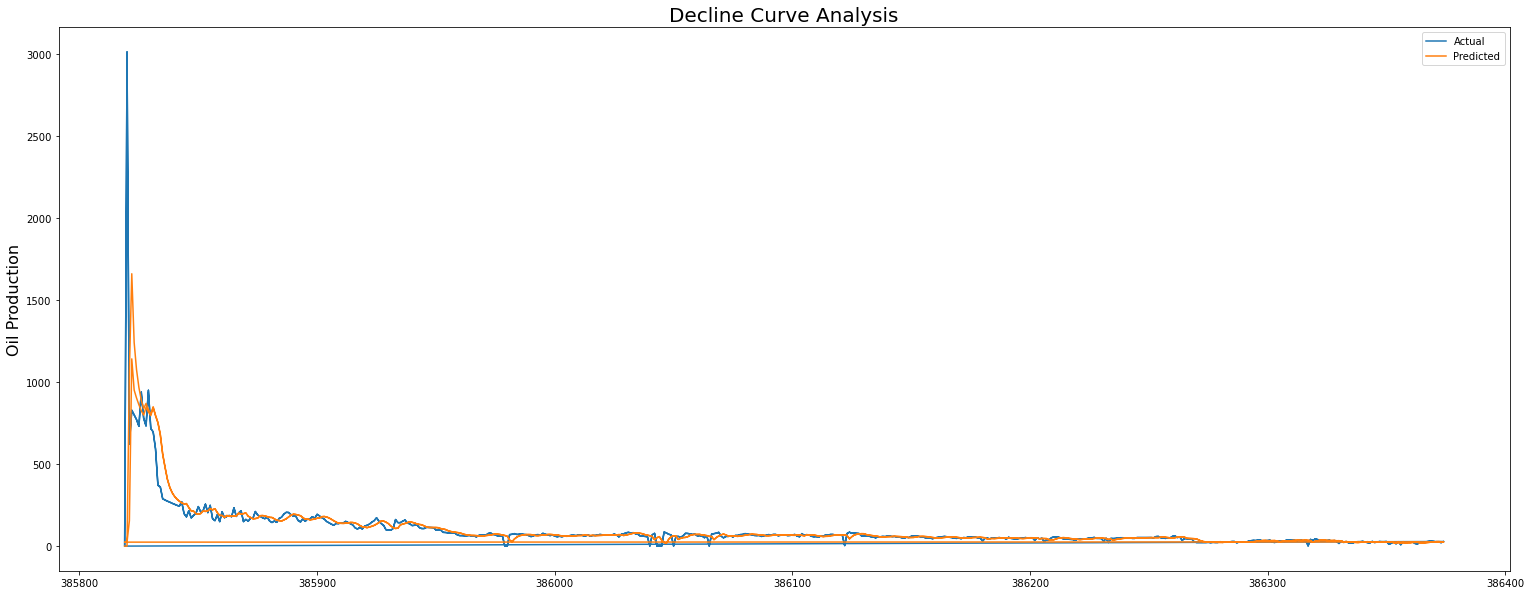

In [83]:
plt.figure(figsize=(26,10))
plt.plot(monthly_gas_1, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Decline Curve Analysis', fontsize=20)
plt.ylabel('Oil Production', fontsize=16)
plt.legend()

In [98]:
df6 = df[df['Entity ID'] == 130157156]

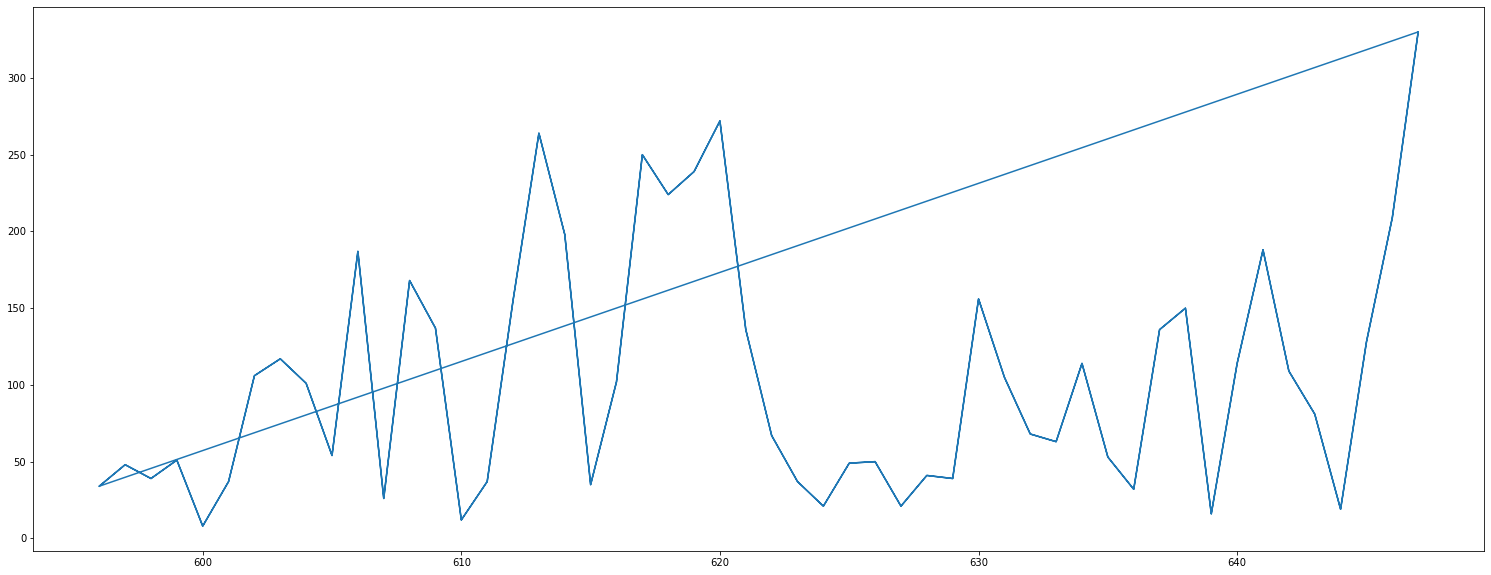

In [99]:
monthly_gas_2 = df6['Monthly Gas']
plt.figure(figsize=(26,10))
plt.plot(monthly_gas_2)


In [100]:
# define the range for p, d, and q
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

# create a list of all possible (p, d, q) tuples
pdq = list(product(p, d, q))

# evaluate ARIMA model with each (p, d, q) tuple
results = []
for param in pdq:
    try:
        model_arima = ARIMA(monthly_gas_2, order=param)
        model_arima_fit = model_arima.fit()
        results.append((param, model_arima_fit.aic))
    except:
        continue

# find the (p, d, q) tuple with the lowest AIC value
best_pdq = min(results, key=lambda x: x[1])[0]

# fit ARIMA model with the best (p, d, q) tuple
model_arima = ARIMA(monthly_gas_2, order=best_pdq)
model_arima_fit = model_arima.fit()

# make ARIMA forecast
arima_forecast = model_arima_fit.forecast(steps=1)

# print forecasts and best (p, d, q) tuple
print("Best (p, d, q) tuple:", best_pdq)
# print("ARIMA Forecast:", arima_forecast[0])

Best (p, d, q) tuple: (0, 1, 2)


In [101]:
predictions = model_arima.fit().predict()

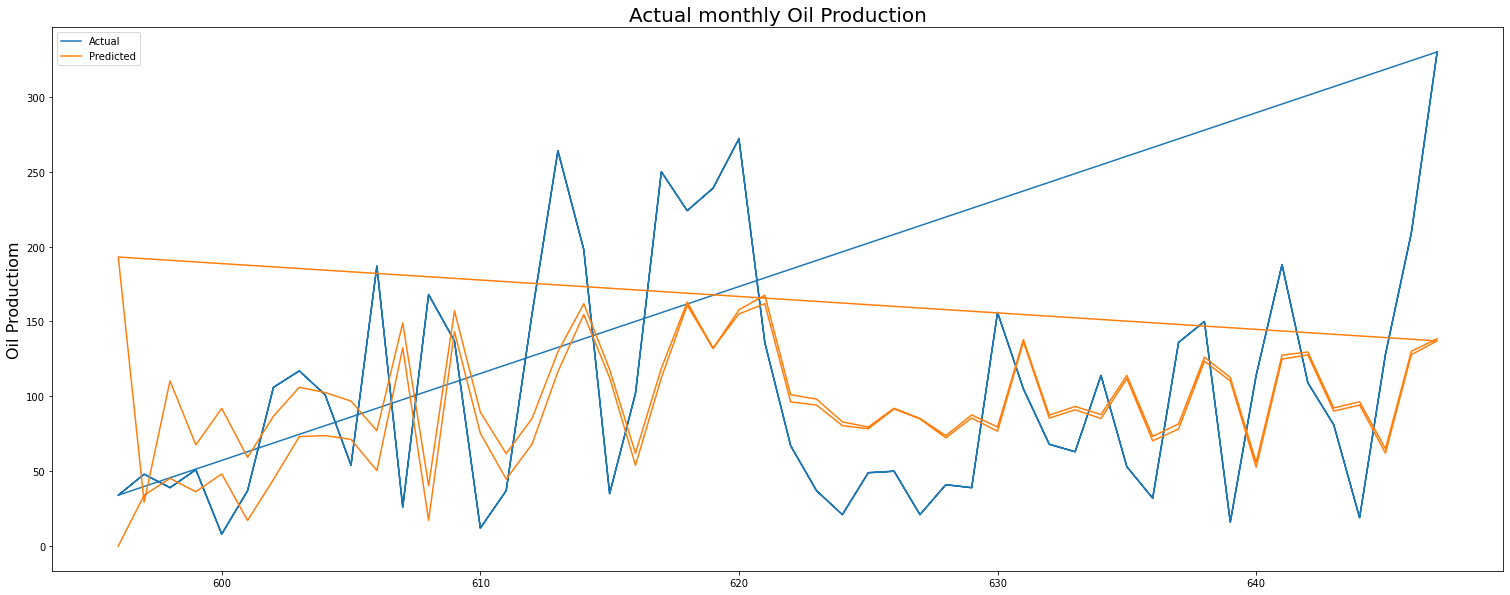

In [104]:
plt.figure(figsize=(26,10))
plt.plot(monthly_gas_2, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Actual monthly Oil Production', fontsize=20)
plt.ylabel('Oil Productiom', fontsize=16)
plt.legend()

In [93]:
df7 = df[df['Entity ID'] == 129566730]
df7

,Entity ID,Monthly Production Date,Monthly Oil,Monthly Gas,Monthly Water,Well Count,Daily Avg Oil,Daily Avg Gas,Daily Avg Water,Reservoir,Well/Lease Name,Entity Type,Producing Month Number,GOR
1104,129566730,4/1/11,60.0,0.0,4709,1,2.00,0.00,156.97,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,COM,1,0.000000
1105,129566730,5/1/11,601.0,7559.0,10101,1,19.39,243.84,325.84,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,COM,2,12.577371
1106,129566730,6/1/11,496.0,5035.0,9205,1,16.53,167.83,306.83,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,COM,3,10.151210
1107,129566730,7/1/11,491.0,6713.0,12274,1,15.84,216.55,395.94,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,COM,4,13.672098
1108,129566730,8/1/11,487.0,6241.0,11462,1,15.71,201.32,369.74,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,COM,5,12.815195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,129566730,9/1/22,92.0,228.0,3941,1,3.07,7.60,131.37,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,COM,138,2.478261
1242,129566730,10/1/22,77.0,201.0,3285,1,2.48,6.48,105.97,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,COM,139,2.610390
1243,129566730,11/1/22,94.0,239.0,4020,1,3.13,7.97,134.00,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,COM,140,2.542553
1244,129566730,12/1/22,95.0,224.0,4059,1,3.06,7.23,130.94,CLEAR FORK,GOLDSMITH-LANDRETH /DEEP/ UNIT,COM,141,2.357895


Text(0.5, 1.0, 'Decline Curve')

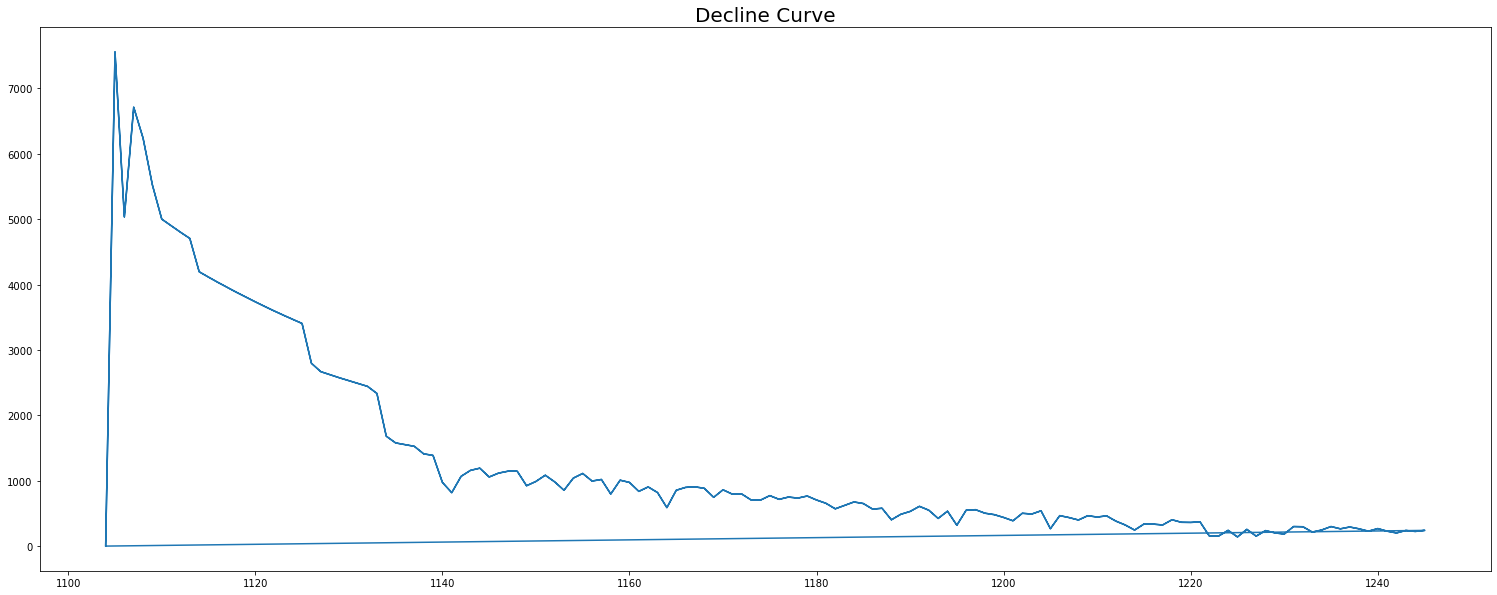

In [94]:
monthly_gas_3 = df7['Monthly Gas']
plt.figure(figsize=(26,10))
plt.plot(monthly_gas_3)
plt.title("Decline Curve", fontsize=20)

In [95]:
# define the range for p, d, and q
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

# create a list of all possible (p, d, q) tuples
pdq = list(product(p, d, q))

# evaluate ARIMA model with each (p, d, q) tuple
results = []
for param in pdq:
    try:
        model_arima = ARIMA(monthly_gas_3, order=param)
        model_arima_fit = model_arima.fit()
        results.append((param, model_arima_fit.aic))
    except:
        continue

# find the (p, d, q) tuple with the lowest AIC value
best_pdq = min(results, key=lambda x: x[1])[0]

# fit ARIMA model with the best (p, d, q) tuple
model_arima = ARIMA(monthly_gas_3, order=best_pdq)
model_arima_fit = model_arima.fit()

# make ARIMA forecast
arima_forecast = model_arima_fit.forecast(steps=1)

# print forecasts and best (p, d, q) tuple
print("Best (p, d, q) tuple:", best_pdq)
# print("ARIMA Forecast:", arima_forecast[0])

Best (p, d, q) tuple: (1, 1, 2)


In [96]:
predictions = model_arima.fit().predict()

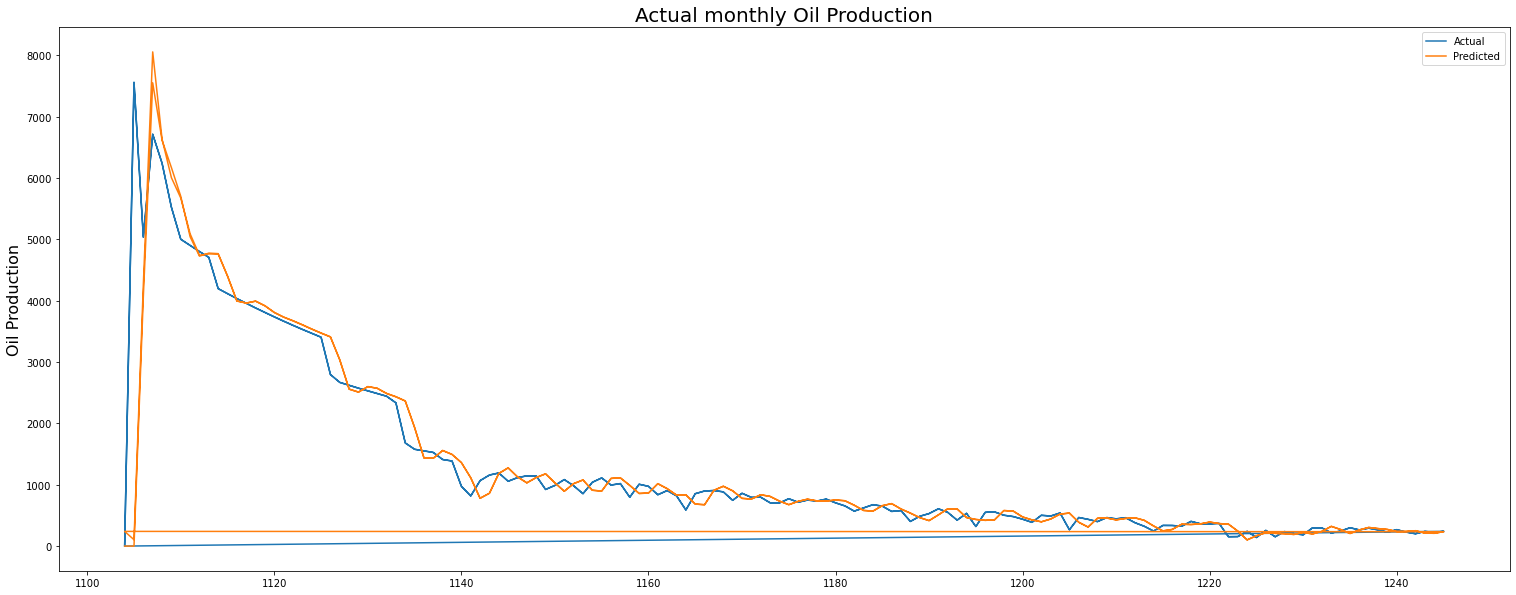

In [97]:
plt.figure(figsize=(26,10))
plt.plot(monthly_gas_3, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Actual monthly Oil Production', fontsize=20)
plt.ylabel('Oil Production', fontsize=16)
plt.legend()

In [ ]:
df['Monthly Production Date'] = pd.to_datetime(df['Monthly Production Date'])
df.set_index('Monthly Production Date', inplace=True)
df['Cumulative Oil'] = df['Monthly Oil'].cumsum()


In [68]:
import warnings
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# ignore warnings
warnings.filterwarnings('ignore')

# define the range for p, d, and q
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

# create a list of all possible (p, d, q) tuples
pdq = list(product(p, d, q))

# evaluate ARIMA model with each (p, d, q) tuple
results = []
for param in pdq:
    try:
        model_arima = ARIMA(df['Cumulative Oil'].values, order=param)
        model_arima_fit = model_arima.fit()
        results.append((param, model_arima_fit.aic))
    except:
        continue

# find the (p, d, q) tuple with the lowest AIC value
best_pdq = min(results, key=lambda x: x[1])[0]

# fit ARIMA model with the best (p, d, q) tuple
model_arima = ARIMA(df['Cumulative Oil'].values, order=best_pdq)
model_arima_fit = model_arima.fit()

# make ARIMA forecast
arima_forecast = model_arima_fit.forecast(steps=1)

# print forecasts and best (p, d, q) tuple
print("Best (p, d, q) tuple:", best_pdq)
print("ARIMA Forecast:", arima_forecast[0])

Best (p, d, q) tuple: (1, 1, 2)
ARIMA Forecast: 414460928.84310037


In [69]:
predictions = model_arima.fit().predict()


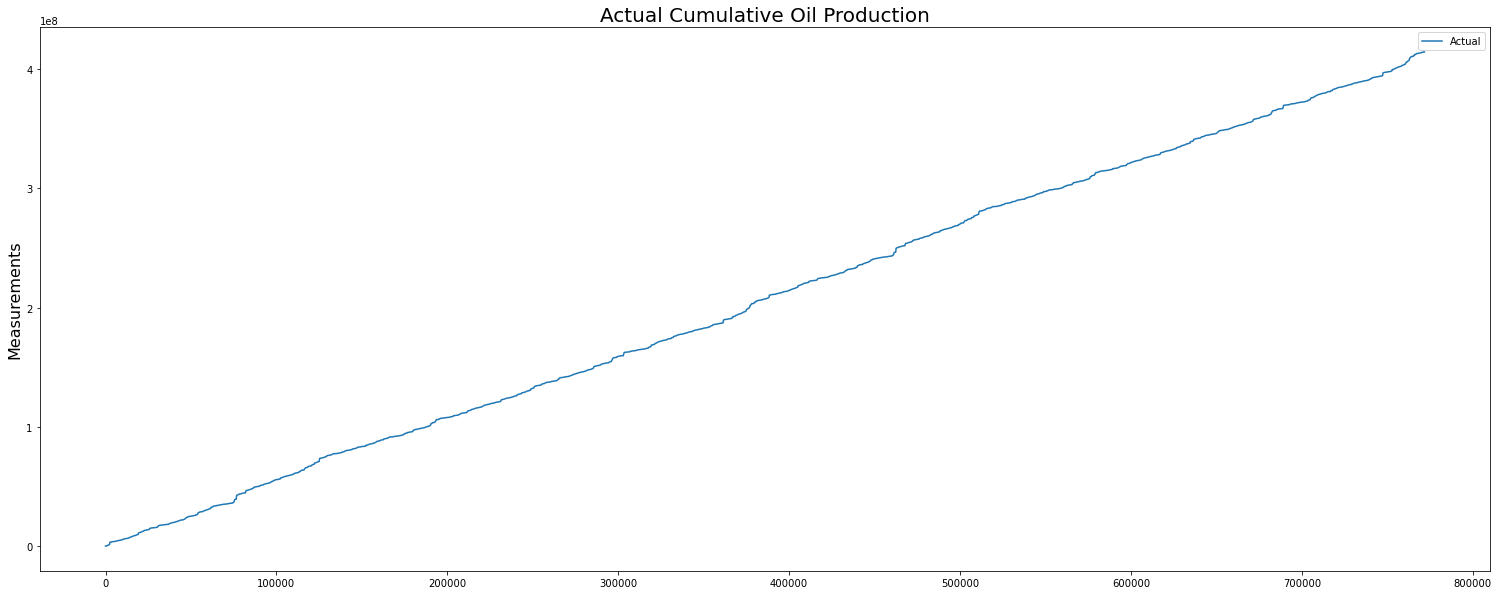

In [74]:
plt.figure(figsize=(26,10))
plt.plot(df['Cumulative Oil'].values, label="Actual")
# plt.plot(predictions, label="Predicted")
plt.title('Actual Cumulative Oil Production', fontsize=20)
plt.ylabel('Measurements', fontsize=16)
plt.legend()

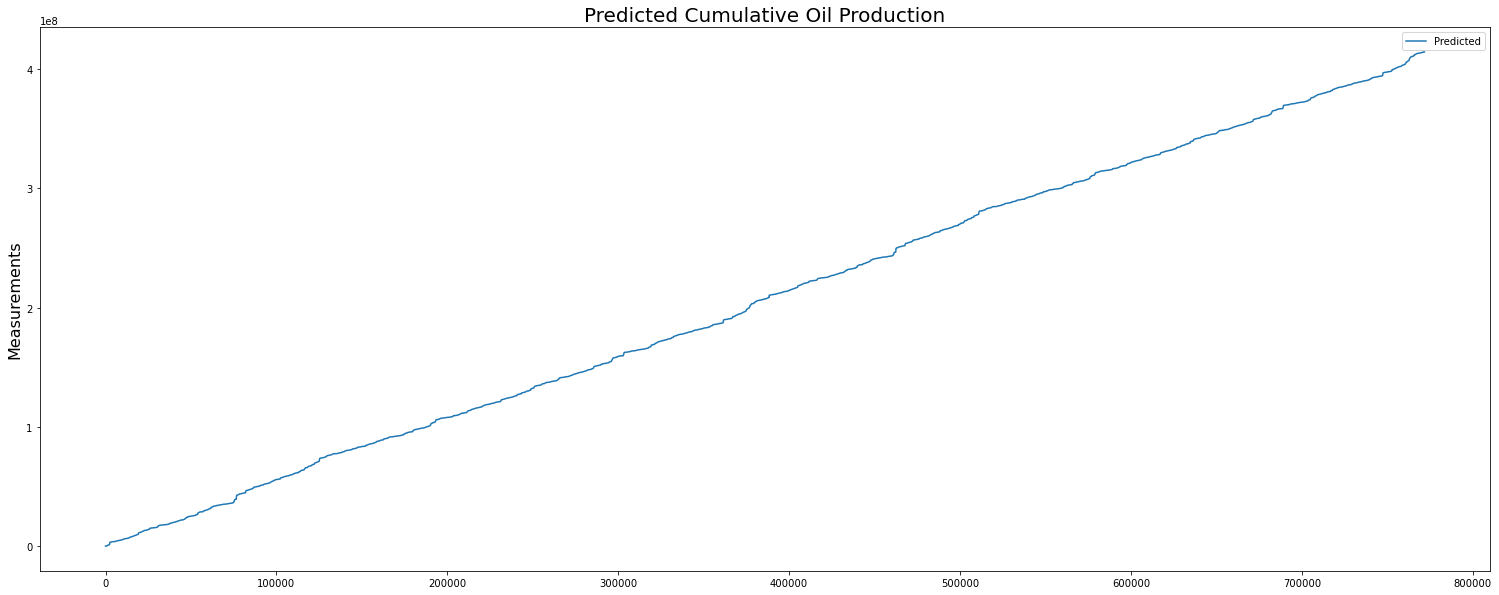

In [75]:
plt.figure(figsize=(26,10))
plt.plot(predictions, label="Predicted")
plt.title('Predicted Cumulative Oil Production', fontsize=20)
plt.ylabel('Measurements', fontsize=16)
plt.legend()

## Conclusion: